# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [2]:
df = pd.read_csv(r"C:\Users\Léo\Downloads\ciencia de dados\MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [3]:
# Cálculo da média e mediana do Preco_Normal por Marca
preco_stats = df.groupby("Marca")["Preco_Normal"].agg(["mean", "median"]).reset_index()
preco_stats["Acima_Media"] = preco_stats["mean"] > preco_stats["median"]
preco_stats = preco_stats.rename(columns={"mean": "Media", "median": "Mediana"})

print(preco_stats.sort_values(by="Media", ascending=False))

                 Marca         Media  Mediana  Acima_Media
106           Plenitud  16799.000000  16799.0        False
145               Tena  10074.500000  10074.5        False
89                Nido   9227.400000  10599.0        False
134            Sofruco   7990.000000   7990.0        False
144             Svelty   7552.333333   7999.0        False
..                 ...           ...      ...          ...
128              Sedal      0.000000      0.0        False
147           Traverso      0.000000      0.0        False
150          Tío Nacho      0.000000      0.0        False
151             Vanart      0.000000      0.0        False
152  Viennetta Bresler      0.000000      0.0        False

[156 rows x 4 columns]


Digite aqui as categorias:

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [4]:
# Cálculo do desvio padrão do Preco_Normal por Marca
std_stats = df.groupby("Marca")["Preco_Normal"].std().reset_index()
std_stats = std_stats.rename(columns={"Preco_Normal": "Desvio_Padrao"})

# Junta com média e mediana
full_stats = pd.merge(preco_stats, std_stats, on="Marca")
full_stats = full_stats.sort_values(by="Desvio_Padrao", ascending=False)

print(full_stats)


           Marca        Media  Mediana  Acima_Media  Desvio_Padrao
75    Loncoleche  4445.560000   1639.0         True    6303.210886
89          Nido  9227.400000  10599.0        False    6085.929452
29         Colun  2752.597701    879.0         True    4828.200258
123    San Jorge  3195.000000   3195.0        False    4518.412332
136      Soprole  1803.539216    607.0         True    3529.125650
..           ...          ...      ...          ...            ...
134      Sofruco  7990.000000   7990.0        False            NaN
139   Super Beef     0.000000      0.0        False            NaN
140  Super Cerdo   859.000000    859.0        False            NaN
146       Tivoni  4450.000000   4450.0        False            NaN
155         Zole  3890.000000   3890.0        False            NaN

[156 rows x 5 columns]


Digite nesse campo o comportamento que você identificou.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

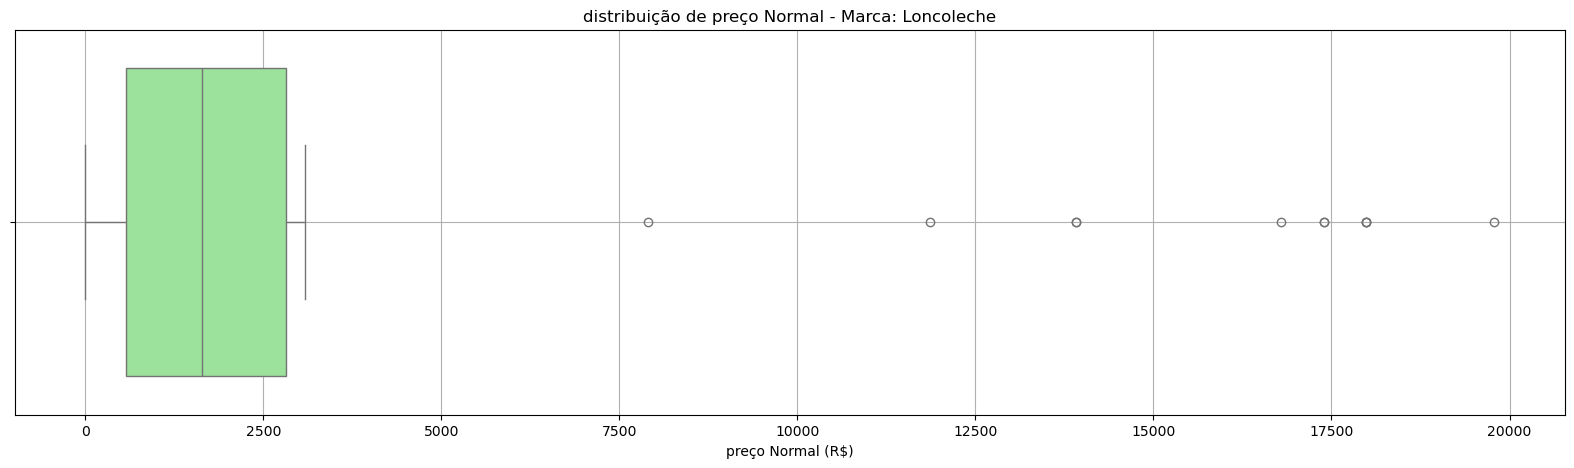

In [11]:
#Filtra a marca com maior desvio padrão
marca_alvo = full_stats.iloc[0]["Marca"]
df_marca = df[df["Marca"]== marca_alvo]

#Gerar o boxplot
plt.figure(figsize=(20,5))
sns.boxplot(x="Preco_Normal",data=df_marca, color="lightgreen")
plt.title(f"distribuição de preço Normal - Marca: {marca_alvo}")
plt.xlabel("preço Normal (R$)")
plt.grid(True)
plt.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

C:\Users\Léo\AppData\Local\Temp\ipykernel_18152\2251085494.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_bar.values, y=df_bar.index, palette="mako")


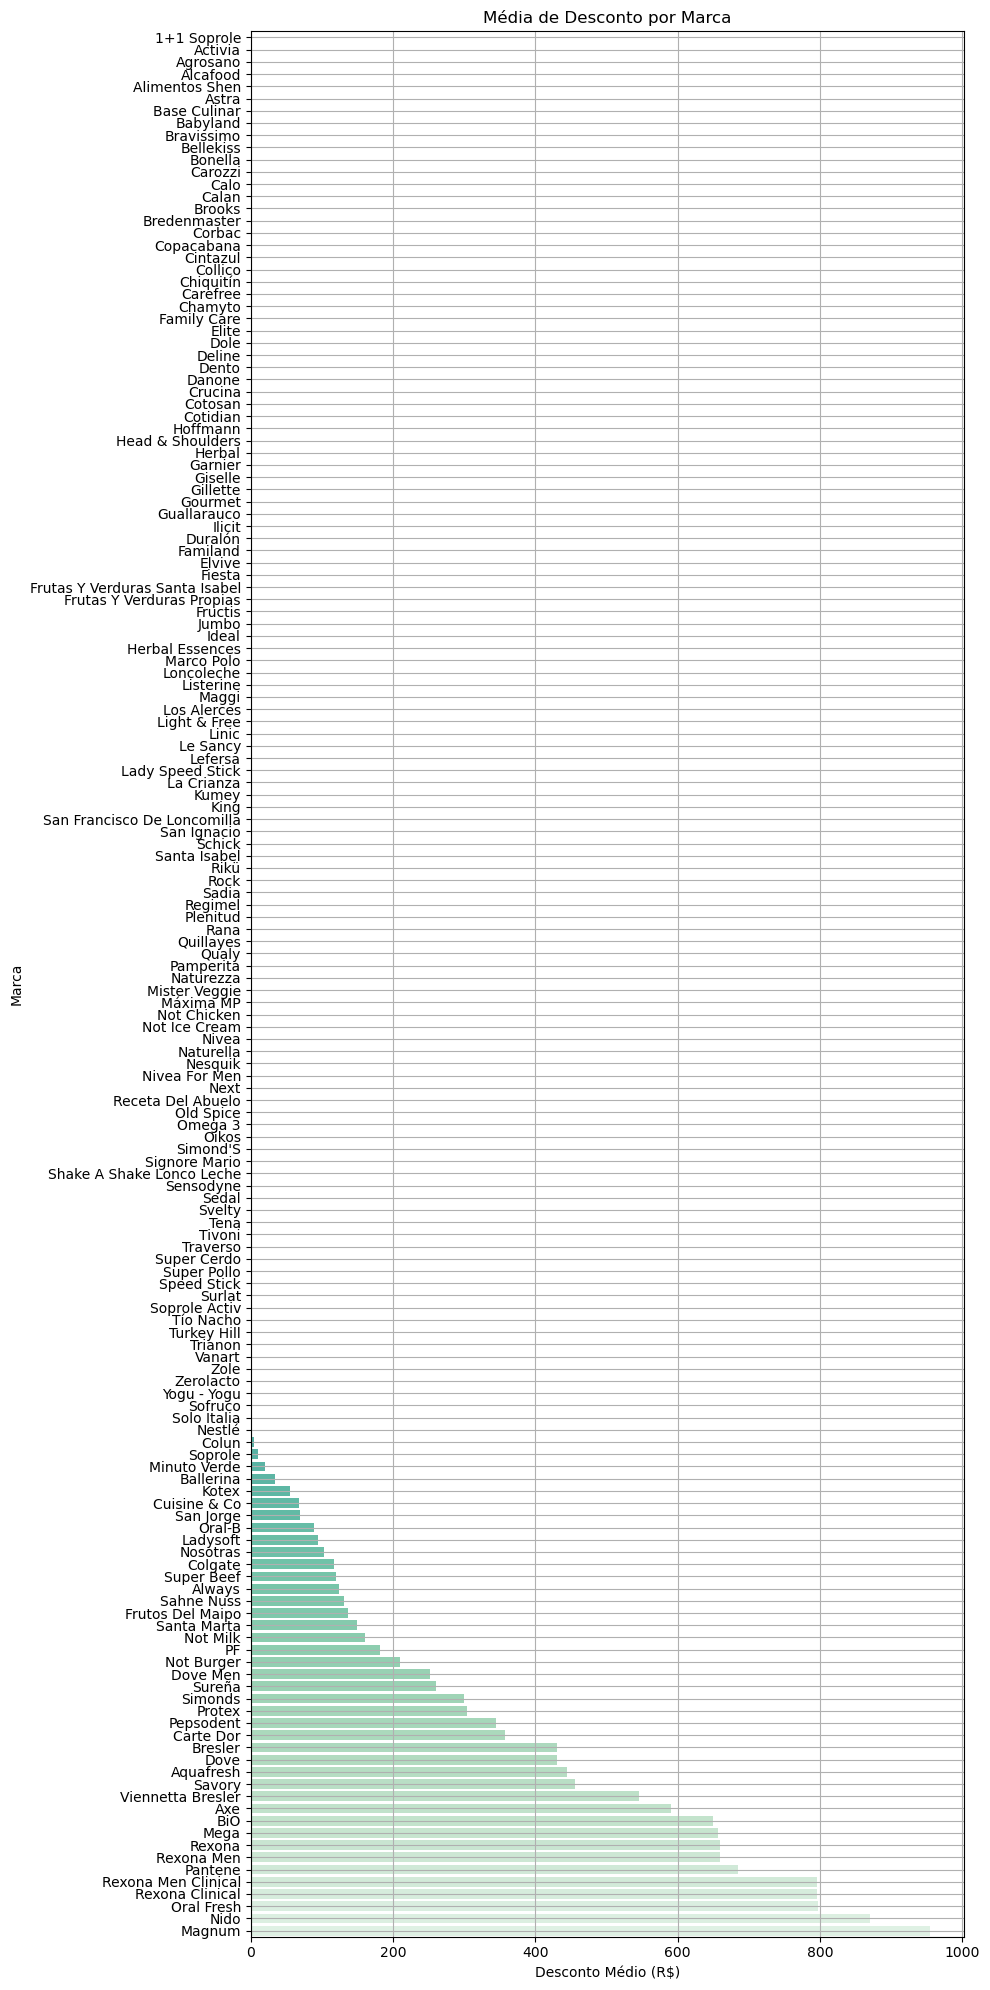

In [6]:
# Média de desconto por marca
df_bar = df.groupby("Marca")["Desconto"].mean().sort_values()


# Plotagem
plt.figure(figsize=(10, 20))
sns.barplot(x=df_bar.values, y=df_bar.index, palette="mako")
plt.title("Média de Desconto por Marca")
plt.xlabel("Desconto Médio (R$)")
plt.ylabel("Marca")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [7]:
# Agrupa por Marca e Produto
df_filtrado = df[df["Desconto"].notna() & (df["Desconto"] > 0)]
df_map = df_filtrado.groupby(["Marca", "title"])["Desconto"].mean().reset_index()

# Gera mapa tipo "treemap"
fig = px.treemap(
    df_map,
    path=["Marca", "title"],
    values="Desconto",
    color="Desconto",
    color_continuous_scale="RdBu",
    title="Média de Desconto por Marca e Produto"
)
fig.show()
